<a href="https://colab.research.google.com/github/Shubh4545/Wikipedia_Article_Classification/blob/main/Wikipedia_Article_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**0.Import Libraries**

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,confusion_matrix

from imblearn.combine import SMOTETomek

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [1]:
! pip install Wikipedia-API
import wikipediaapi
import pandas as pd
import pandas as pd
import wikipediaapi
import math
import json
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**1.Clean Dataset**

In [3]:
dataset=pd.read_csv('/content/drive/MyDrive/COLAB/wiki/existing_data.csv')
dataset.head()

,Title,Article Name,Summary,Full Text,Links,Sections,Categories,Class
0,List of Beast Wars episodes,Double_Dinobot,The episodes listed below are from the animate...,The episodes listed below are from the animate...,"['Airazor', 'Ark (Transformers)', 'Asaph Fipke...",3,"['All articles lacking sources', 'Articles lac...",NaN
1,Emeka Jude Ugali,Emeka_Jude_Ugali,Emeka Jude Ugali (born 28 May 1982) is a retir...,Emeka Jude Ugali (born 28 May 1982) is a retir...,"['A.C. Monza', 'A.C. Monza Brianza 1912', 'Der...",2,"['1982 births', 'A.C. Monza players', 'All art...",Start
2,N?rnberg Falcons BC,NÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,"N?rnberg Falcons BC, formerly called N?rnberge...","N?rnberg Falcons BC, formerly called N?rnberge...","['2012?13 ProA', '2013?14 ProA', '2014?15 ProA...",5,['Articles needing translation from German Wik...,NaN
3,Tareq wa Shireen,Tareq_wa_Shireen,Tareq wa Shireen (Arabic: ???? ? ?????) is one...,Tareq wa Shireen (Arabic: ???? ? ?????) is one...,"['Animation', 'Arabic', 'Arabic heritage', 'Ar...",4,"['2000s Jordanian television series', '2000s a...",Stub
4,Coco (2009 film),Coco_(2009_film),"Coco is a 2009 French comedy film written, dir...","Coco is a 2009 French comedy film written, dir...","['Alain Goldman', 'Ary Abittan', 'Bar mitzvah'...",4,"['2000s French-language films', '2000s French ...",Stub


In [51]:
#Good to work on copy of dataset than original dataset
df=dataset.copy()  
df.shape 

(9744, 8)

In [52]:
df.isnull().sum()

Title              0
Article Name       1
Summary         1018
Full Text       1018
Links              1
Sections           1
Categories         1
Class           3176
dtype: int64

In [54]:
df.dropna(subset=['Class'], inplace=True)


In [55]:
df['Class'].value_counts()

Stub                                   3982
Start                                  1734
C                                       326
List                                    243
FA                                      133
B                                       108
GA                                       40
start}}{{WikiProject Southeast Asia       1
Class                                     1
Name: Class, dtype: int64

**As Summary and Full Text have null values present but i think we should not drop as nothing means something valueble here**

**Class is our dependent variable more than 30% data null so we are going to think about it**

In [56]:
df.duplicated().sum()

42

In [57]:
df.drop_duplicates()

,Title,Article Name,Summary,Full Text,Links,Sections,Categories,Class
1,Emeka Jude Ugali,Emeka_Jude_Ugali,Emeka Jude Ugali (born 28 May 1982) is a retir...,Emeka Jude Ugali (born 28 May 1982) is a retir...,"['A.C. Monza', 'A.C. Monza Brianza 1912', 'Der...",2,"['1982 births', 'A.C. Monza players', 'All art...",Start
3,Tareq wa Shireen,Tareq_wa_Shireen,Tareq wa Shireen (Arabic: ???? ? ?????) is one...,Tareq wa Shireen (Arabic: ???? ? ?????) is one...,"['Animation', 'Arabic', 'Arabic heritage', 'Ar...",4,"['2000s Jordanian television series', '2000s a...",Stub
4,Coco (2009 film),Coco_(2009_film),"Coco is a 2009 French comedy film written, dir...","Coco is a 2009 French comedy film written, dir...","['Alain Goldman', 'Ary Abittan', 'Bar mitzvah'...",4,"['2000s French-language films', '2000s French ...",Stub
5,Nicol?s Lombardo,NicolÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,"Nicol?s Italo Lombardo, also known as Nicola I...","Nicol?s Italo Lombardo, also known as Nicola I...","['A.C. Pisa 1909 S.S.D.', 'A.S. Roma', 'Agust?...",0,"['1903 births', 'A.S. Roma players', 'All stub...",Stub
6,Shuriken Sentai Ninninger,Shuriken_Sentai_Ninninger,"Shuriken Sentai Ninninger (????????????, Shuri...","Shuriken Sentai Ninninger (????????????, Shuri...","['Action fiction', 'Amazon Riders', 'Atsushi M...",11,"['2015 Japanese television series debuts', '20...",Start
...,...,...,...,...,...,...,...,...
9738,Perij? tapaculo,PerijÃÂÃÂ¡_tapaculo,The Perij? tapaculo (Scytalopus perijanus) is ...,The Perij? tapaculo (Scytalopus perijanus) is ...,"['Alexander Cort?s Diago', ""American Ornitholo...",7,"['Articles containing video clips', ""Articles ...",FA
9739,Albert Ket?lbey,Albert_KetÃÂ¨lbey,Albert William Ket?lbey (; born Ketelbey; 9 Au...,Albert William Ket?lbey (; born Ketelbey; 9 Au...,"['Adelphi Theatre', 'Alfred R. Gaul', 'Alice i...",5,"['1875 births', '1959 deaths', '19th-century B...",FA
9740,Perij? tapaculo,PerijÃÂ¡_tapaculo,The Perij? tapaculo (Scytalopus perijanus) is ...,The Perij? tapaculo (Scytalopus perijanus) is ...,"['Alexander Cort?s Diago', ""American Ornitholo...",7,"['Articles containing video clips', ""Articles ...",FA
9741,Perij? tapaculo,PerijÃ¡_tapaculo,The Perij? tapaculo (Scytalopus perijanus) is ...,The Perij? tapaculo (Scytalopus perijanus) is ...,"['Alexander Cort?s Diago', ""American Ornitholo...",7,"['Articles containing video clips', ""Articles ...",FA


In [58]:
df.isnull().sum()

Title             0
Article Name      0
Summary         399
Full Text       399
Links             0
Sections          0
Categories        0
Class             0
dtype: int64

In [59]:
df.rename(
    columns=({ 'Full Text': 'Full_Text'}), 
    inplace=True,)


In [60]:
df.dtypes

Title           object
Article Name    object
Summary         object
Full_Text       object
Links           object
Sections        object
Categories      object
Class           object
dtype: object

**As Sections coulmn is object type we need convert it in int**

In [62]:
df['Sections'] = pd.to_numeric(df['Sections'], errors='coerce').fillna(0).astype(int)



#**2.Encoding**

**1. Tried to check Title and Article name present in Full Text or not but getting out 1 or o by adjusting threshhold so i decided to remove columns as they are not helful**

In [67]:
df.drop(['Title','Article Name'],inplace=True,axis=1)

In [68]:
df

,Summary,Full_Text,Links,Sections,Categories,Class
1,Emeka Jude Ugali (born 28 May 1982) is a retir...,Emeka Jude Ugali (born 28 May 1982) is a retir...,"['A.C. Monza', 'A.C. Monza Brianza 1912', 'Der...",2,"['1982 births', 'A.C. Monza players', 'All art...",Start
3,Tareq wa Shireen (Arabic: ???? ? ?????) is one...,Tareq wa Shireen (Arabic: ???? ? ?????) is one...,"['Animation', 'Arabic', 'Arabic heritage', 'Ar...",4,"['2000s Jordanian television series', '2000s a...",Stub
4,"Coco is a 2009 French comedy film written, dir...","Coco is a 2009 French comedy film written, dir...","['Alain Goldman', 'Ary Abittan', 'Bar mitzvah'...",4,"['2000s French-language films', '2000s French ...",Stub
5,"Nicol?s Italo Lombardo, also known as Nicola I...","Nicol?s Italo Lombardo, also known as Nicola I...","['A.C. Pisa 1909 S.S.D.', 'A.S. Roma', 'Agust?...",0,"['1903 births', 'A.S. Roma players', 'All stub...",Stub
6,"Shuriken Sentai Ninninger (????????????, Shuri...","Shuriken Sentai Ninninger (????????????, Shuri...","['Action fiction', 'Amazon Riders', 'Atsushi M...",11,"['2015 Japanese television series debuts', '20...",Start
...,...,...,...,...,...,...
9738,The Perij? tapaculo (Scytalopus perijanus) is ...,The Perij? tapaculo (Scytalopus perijanus) is ...,"['Alexander Cort?s Diago', ""American Ornitholo...",7,"['Articles containing video clips', ""Articles ...",FA
9739,Albert William Ket?lbey (; born Ketelbey; 9 Au...,Albert William Ket?lbey (; born Ketelbey; 9 Au...,"['Adelphi Theatre', 'Alfred R. Gaul', 'Alice i...",5,"['1875 births', '1959 deaths', '19th-century B...",FA
9740,The Perij? tapaculo (Scytalopus perijanus) is ...,The Perij? tapaculo (Scytalopus perijanus) is ...,"['Alexander Cort?s Diago', ""American Ornitholo...",7,"['Articles containing video clips', ""Articles ...",FA
9741,The Perij? tapaculo (Scytalopus perijanus) is ...,The Perij? tapaculo (Scytalopus perijanus) is ...,"['Alexander Cort?s Diago', ""American Ornitholo...",7,"['Articles containing video clips', ""Articles ...",FA


**2.As Summary and Full Text are two coluns are text detaset we are coverting it into length of text**

In [69]:
df['Summary_Length'] = df['Summary'].str.len()
df['Full_Text_Length'] = df['Full_Text'].str.len()
df.drop(['Full_Text','Summary'],inplace=True,axis=1)


**3.As Links column contains number of links in string format seperated by columns we are going to count it and put count in new column**

In [70]:
df['Links_Count'] = df['Links'].str.count(',') + 1
df.drop('Links',inplace=True,axis=1)

**3.As Categories column contains number of Categories in string format seperated by columns we are going to count it and put count in new column Categories_count**

In [71]:
df['Categories_count'] = df['Categories'].str.count(',') + 1
df.drop('Categories',inplace=True,axis=1)
df

,Sections,Class,Summary_Length,Full_Text_Length,Links_Count,Categories_count
1,2,Start,75.0,1752.0,28,24
3,4,Stub,391.0,956.0,16,12
4,4,Stub,514.0,948.0,32,12
5,0,Stub,293.0,293.0,81,20
6,11,Start,1128.0,11978.0,163,12
...,...,...,...,...,...,...
9738,7,FA,1110.0,9698.0,91,12
9739,5,FA,2486.0,32935.0,195,64
9740,7,FA,1110.0,9698.0,91,12
9741,7,FA,1110.0,9698.0,91,12


#**3.EDA**

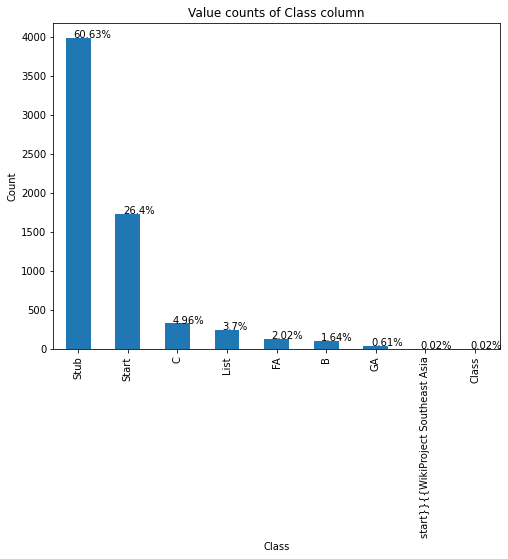

In [20]:

import pandas as pd
import matplotlib.pyplot as plt
# Get value counts of 'Class' column
class_counts = df['Class'].value_counts()

# Calculate percentages
total = sum(class_counts)
percentages = [(count/total)*100 for count in class_counts]

# Plot bar chart
plt.figure(figsize=(8,6))
ax = class_counts.plot(kind='bar')
plt.title('Value counts of Class column')
plt.xlabel('Class')
plt.ylabel('Count')

# Add percentage labels
for i, v in enumerate(class_counts):
    ax.text(i-0.1, v+5, str(round(percentages[i], 2))+'%', color='black', fontsize=10)

plt.show()



In [73]:
df.Class.unique()

array(['Start', 'Stub', 'List', 'C', 'B', 'GA', 'FA',
       'start}}{{WikiProject Southeast Asia', 'Class'], dtype=object)

In [76]:
df['Class_Binary'] = (df['Class'] == 'FA').astype(int)
df.drop('Class',inplace=True,axis=1)

#**4.Split dataset**

**split dependent and independent features**

In [77]:
p= df.drop(['Class_Binary'],axis=1)
q= df['Class_Binary']


**Split data into train ad test data**

In [78]:
X_train, X_test, y_train, y_test = train_test_split(p, q, test_size=0.33, random_state=42)

NameError: ignored

**Scalling**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**Models**

In [ ]:

lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train, y_train)
test_predicted=lr_model.predict(X_test)
train_predicted=lr_model.predict(X_test)

print()
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print ("The aurroc_auc_score of Logistic Regression is : ", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))
